カルフォルニアの住宅データをクラスタリングをして飲食店ビジネスに役立ちそうな知見を見出す。

In [1]:
# 必要なライブラリのインポート
import pandas as pd
import seaborn as sns


In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d4c96ee93388fe90f3e9b3d5696ed892ef842fc0c23a380a260841df83303ce1
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [6]:
# 続いてjapanize_matplotlibのインポート
import japanize_matplotlib

In [7]:
df = pd.read_csv('/content/calfornia_housing_cleansing.csv')
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [5]:
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621
1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641
2,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410
3,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026
4,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596


In [8]:
df.shape

(18572, 9)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X = df.to_numpy()
scaler.fit(X)

StandardScaler()

In [17]:
X_scaled = scaler.transform(X)
X_scaled

array([[-1.74592263,  2.95027401,  1.22609842, ...,  2.745577  ,
         0.7095734 ,  0.01067288],
       [-1.74575408,  2.9351148 , -0.5234521 , ...,  1.76319575,
         0.90892516,  0.25820709],
       [-1.74457421, -1.02729904,  1.31357595, ...,  0.38723561,
         0.16225546,  0.6325512 ],
       ...,
       [ 1.73249678, -1.26959164, -0.87336221, ..., -1.01586791,
         0.26894728,  0.344762  ],
       [ 1.73266533, -1.163095  , -0.78588468, ..., -1.09521007,
         0.51108372,  0.63480794],
       [ 1.73283389, -0.83099363, -0.96083973, ..., -1.04614321,
         0.06368403,  0.19008646]])

In [18]:
from sklearn.cluster import KMeans

In [19]:
model = KMeans(n_clusters=4, random_state=0)

In [20]:
model.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
model.labels_

array([2, 2, 3, ..., 3, 3, 3], dtype=int32)

In [29]:
df['クラスター'] = model.labels_
df.head()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人,クラスター
0,0,8.3252,41.0,322.0,37.88,-122.23,4.526,2.732919,0.400621,2
1,1,8.3014,21.0,2401.0,37.86,-122.22,3.585,2.956685,0.460641,2
2,8,2.0804,42.0,1206.0,37.84,-122.26,2.267,2.118574,0.551410,3
3,15,2.1250,50.0,697.0,37.85,-122.26,1.400,1.606887,0.406026,3
4,18,1.9911,50.0,990.0,37.84,-122.26,1.587,2.261616,0.459596,3


<Axes: xlabel='クラスター', ylabel='count'>

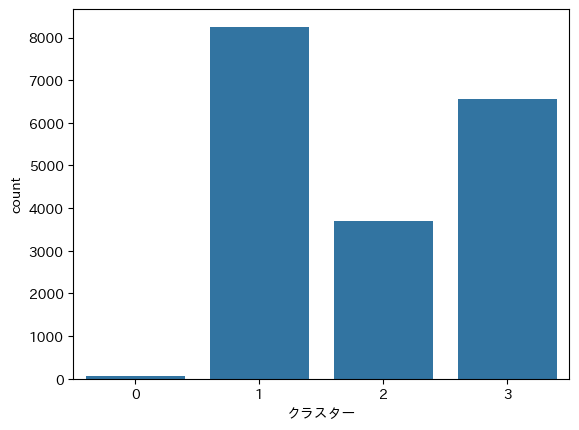

In [31]:
sns.countplot(x='クラスター', data=df)

In [28]:
df.groupby('クラスター').mean()

,Unnamed: 0,所得,築年数,地域人口,緯度,経度,住宅価格,部屋数/人,寝室数/人
クラスター,,,,,,,,,
0,9515.896552,3.411902,17.844828,258.465517,37.657931,-119.398621,1.631759,15.491913,3.311716
1,8951.515508,3.055356,29.157984,1566.897020,34.016310,-117.968321,1.569633,1.604427,0.363671
2,11140.633784,5.798355,23.588649,1584.758919,34.772859,-119.059641,3.206880,2.341537,0.404615
3,11694.629726,3.311060,26.244055,1295.178506,38.021819,-121.633811,1.569829,2.005876,0.411796


<Axes: xlabel='経度', ylabel='緯度'>

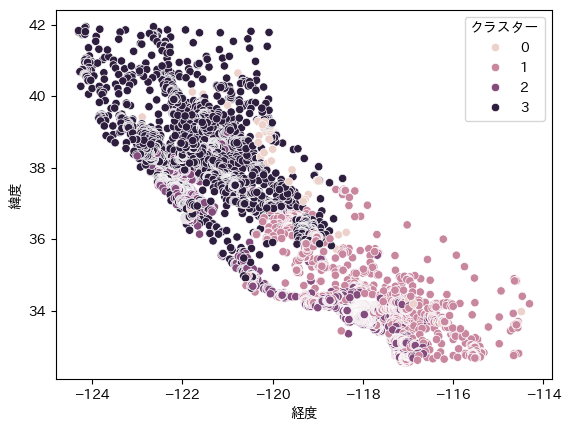

In [32]:
sns.scatterplot(x='経度', y='緯度', hue='クラスター', data=df)

<Axes: xlabel='経度', ylabel='緯度'>

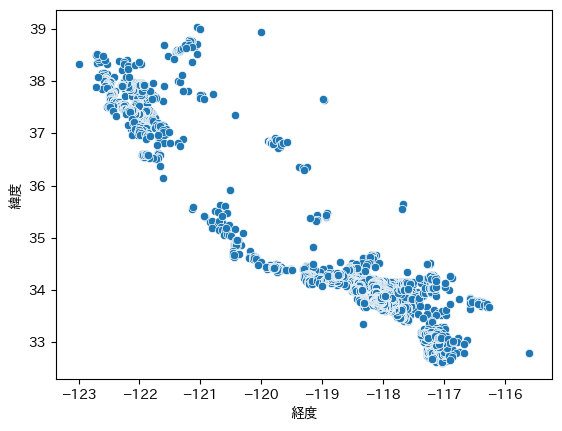

In [33]:
df_cluster2 = df.query('クラスター == 2')
sns.scatterplot(x='経度', y='緯度', data=df_cluster2)

<Axes: xlabel='地域人口', ylabel='Count'>

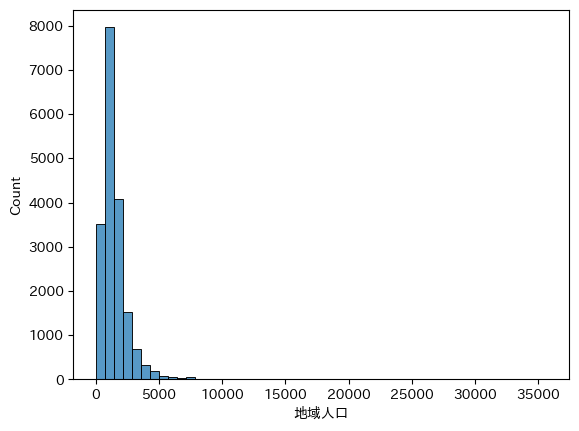

In [34]:
sns.histplot(x='地域人口', data=df, bins=50)

<Axes: xlabel='経度', ylabel='緯度'>

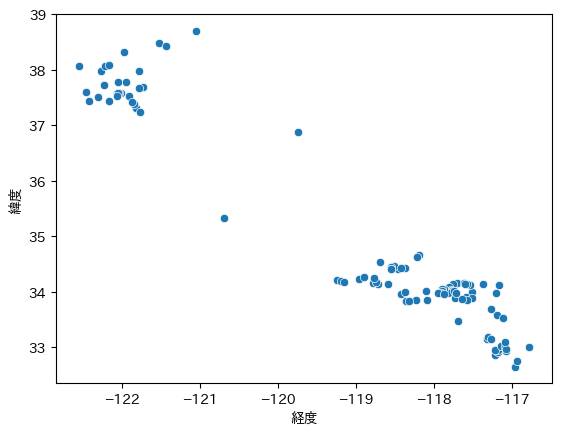

In [36]:
sns.scatterplot(x='経度', y='緯度', data=df_cluster2.query('地域人口 > 5000'))